In [1]:
import numpy as np
import pandas as pd

import os
#pd.set_option('mode.chained_assignment','raise')


In [2]:
chemin = '/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee'

for dirname, _, filenames in os.walk(chemin):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/application_test.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/.DS_Store
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/HomeCredit_columns_description.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/POS_CASH_balance.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/credit_card_balance.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/installments_payments.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/application_train.csv
/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/bureau.csv
/Users/yashwanth_mourouguessin

# I. Nettoyage

In [3]:
# training dataset
train_df = pd.read_csv('/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/application_train.csv', 
                       index_col='SK_ID_CURR')
train_df.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df = pd.read_csv('/Users/yashwanth_mourouguessin/Desktop/Openclassrooms/P7_mourouguessin_yashwanth_with_donnee/donnee/application_test.csv', 
                      index_col='SK_ID_CURR')
test_df.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [5]:
print(f'La table de train contient {train_df.shape[0]} lignes et {train_df.shape[1]} colonnes.')
print(f'La table de test contient {test_df.shape[0]} lignes et {test_df.shape[1]} colonnes.')

La table de train contient 307511 lignes et 121 colonnes.
La table de test contient 48744 lignes et 120 colonnes.


In [6]:
# all NaNs
print(f'Nbre de NaN dans Train: {train_df.isnull().sum().sum()}')
print(f'Nbre de NaN dans Test: {test_df.isnull().sum().sum()}')

Nbre de NaN dans Train: 9152465
Nbre de NaN dans Test: 1404419


In [7]:
# Countage de NaN et le pourcentage
columns = train_df.isnull().sum()[train_df.isnull().sum() != 0].keys()
nans_count = train_df.isnull().sum()[train_df.isnull().sum() != 0].values
nans_percentage = train_df.isnull().sum()[train_df.isnull().sum() != 0].values/train_df.shape[0]

# Creation d'un dataframe pour ce dernier 
nans_df = pd.DataFrame({'Colonne':columns, 'Nombre de NaN':nans_count, '% de NaN':nans_percentage*100})
nans_df = nans_df.sort_values(by='% de NaN', ascending=False)
nans_df

,Colonne,Nombre de NaN,% de NaN
41,COMMONAREA_MEDI,214865,69.872297
13,COMMONAREA_AVG,214865,69.872297
27,COMMONAREA_MODE,214865,69.872297
49,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
35,NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...,...
7,EXT_SOURCE_2,660,0.214626
1,AMT_GOODS_PRICE,278,0.090403
0,AMT_ANNUITY,12,0.003902
5,CNT_FAM_MEMBERS,2,0.000650


In [8]:
#nans_df.loc[nans_df['% de NaN']>40].Colonne.tolist()

In [9]:
# Rechercher la presence de doublons
train_df.duplicated().sum()

0

0    282686
1     24825
Name: TARGET, dtype: int64


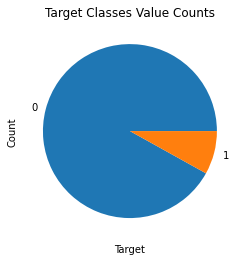

In [10]:
print(train_df['TARGET'].value_counts())

import matplotlib.pyplot as plt
train_df['TARGET'].value_counts().plot(kind='pie');
plt.title('Target Classes Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [11]:
# Recuperation des differenst valeurs pour chaque colonnes de type Object et creation d'un DataFrame
unique_df = pd.DataFrame(train_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: train_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
1,CODE_GENDER,3,"[M, F, XNA]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific..."
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg ..."
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
8,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."


In [12]:
# Regarder les CODE_GENDER
print('Train Dataset')
print(train_df['CODE_GENDER'].value_counts())

print('\nTest Dataset')
print(test_df['CODE_GENDER'].value_counts())

Train Dataset
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Test Dataset
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


- On peut supprimer les 4 XNA dans le corpus de TRAIN
- On pourra utiliser le LabelEnconding pour transformer les differents valeurs des colonnes de type Object

Columns Correlation

In [13]:
print('5 premiers colonnes avec une correlation positive par rapport à TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().tail(5))

print('\n5 premiers colonnes avec une correlation negative par rapport à TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().head(5))

5 premiers colonnes avec une correlation positive par rapport à TARGET
 --------------------------------------------------
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

5 premiers colonnes avec une correlation negative par rapport à TARGET
 --------------------------------------------------
EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


- Pas de correlation entre le TARGET et les features.

Outliers

In [14]:
# Colonne autre que Object (les colonnes numeriques)
all_numerical_cols = list(train_df.select_dtypes(exclude='object').columns)

# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 78


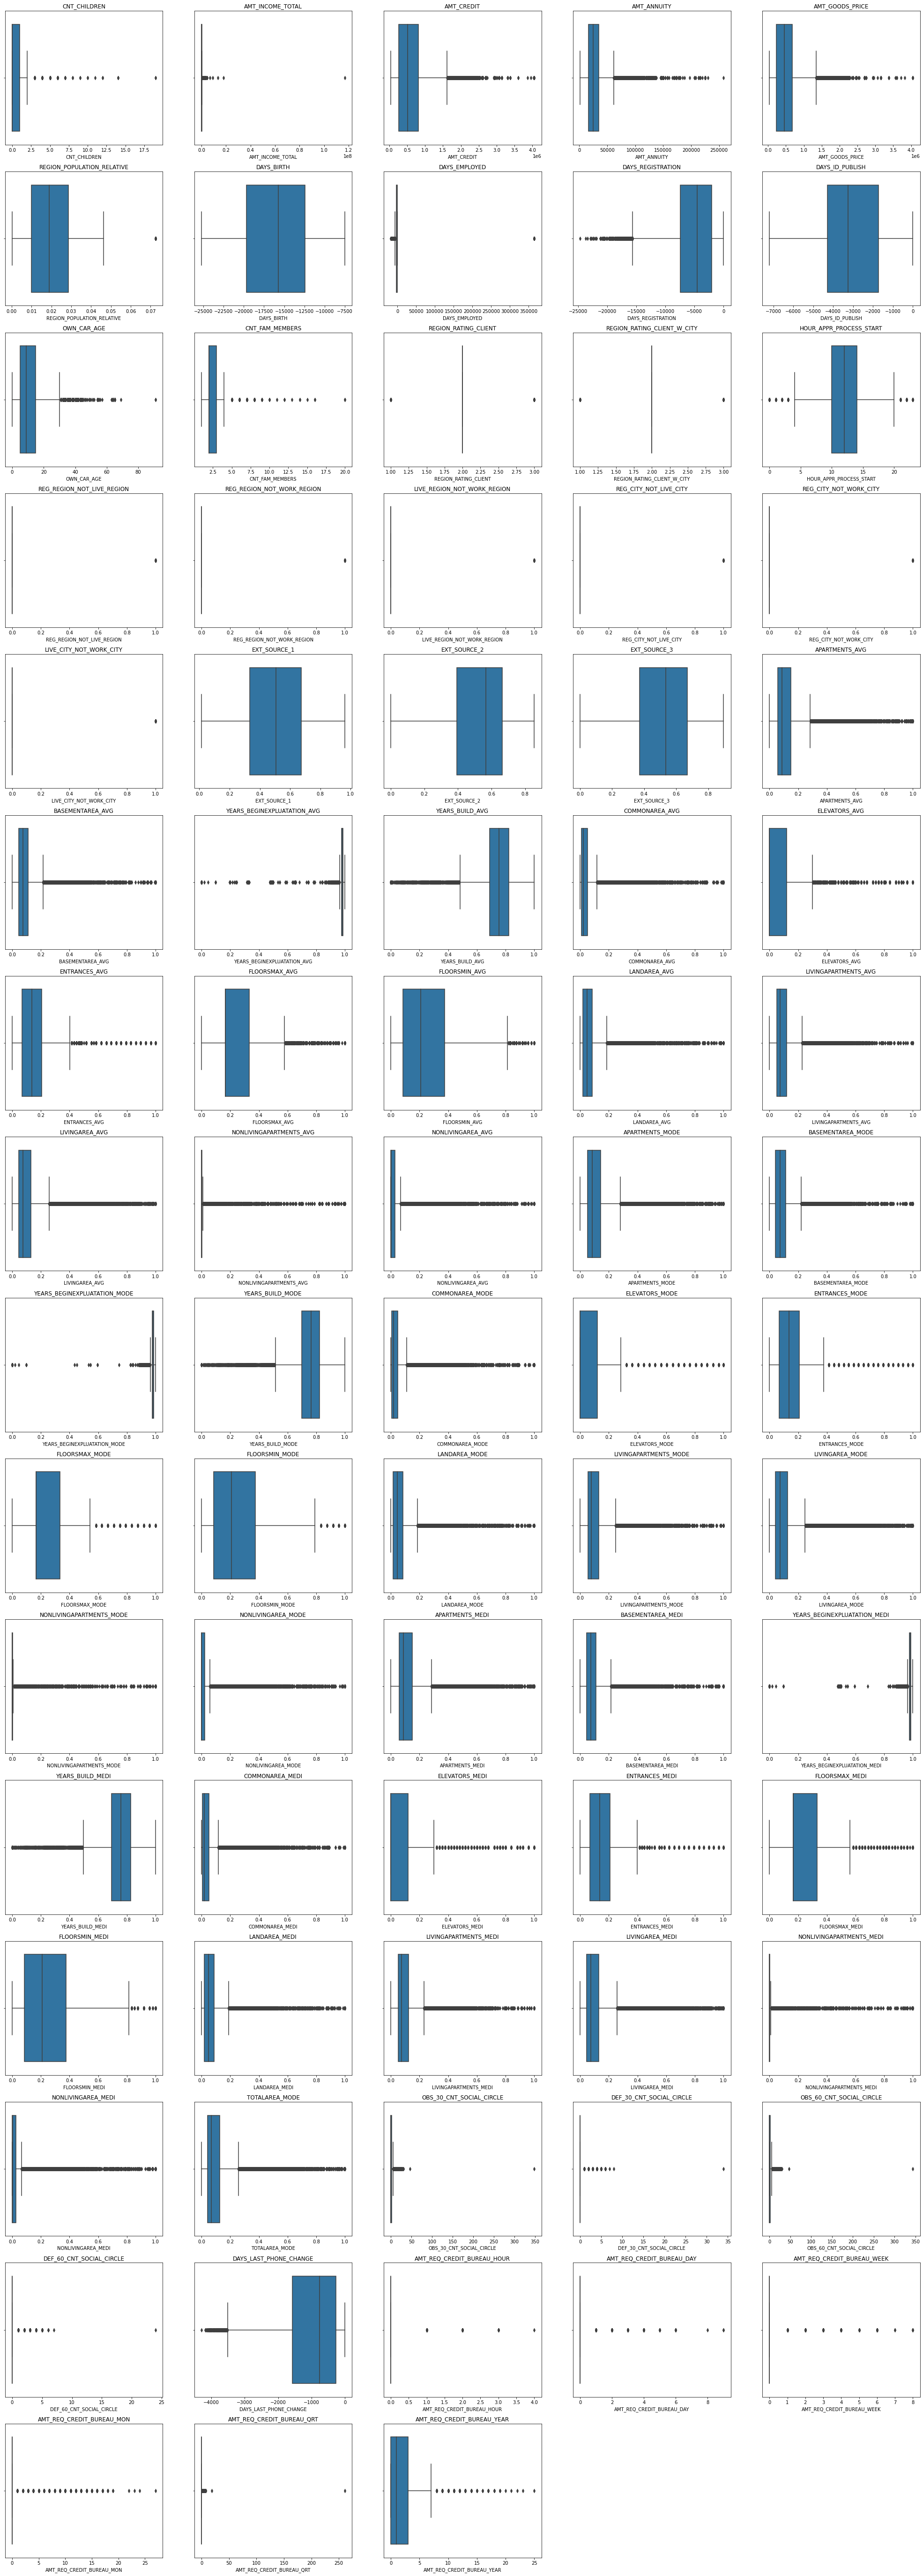

In [15]:
import seaborn as sns
# draw boxplots for each continuous column
plt.figure(figsize=(35, 100))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=train_df, x=col)
    plt.title(col)

In [16]:
for i in range(0, len(cont_cols), 10):
    if i == 70:
        display(train_df[cont_cols[i:78]].describe())
    else:
        display(train_df[cont_cols[i:i+10]].describe())

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000


,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
count,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,12.061091,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454
std,11.944812,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG
count,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000
mean,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942
std,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576
min,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000
50%,0.000000,0.505998,5.659614e-01,0.535276,0.08760,0.076300,0.981600,0.755200,0.021100,0.000000
75%,0.000000,0.675053,6.636171e-01,0.669057,0.14850,0.112200,0.986600,0.823200,0.051500,0.120000
max,1.000000,0.962693,8.549997e-01,0.896010,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE
count,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000
mean,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543
std,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700
50%,0.137900,0.166700,0.208300,0.048100,0.075600,0.074500,0.000000,0.003600,0.084000,0.074600
75%,0.206900,0.333300,0.375000,0.085600,0.121000,0.129900,0.003900,0.027700,0.143900,0.112400
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE
count,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000
mean,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975
std,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700
50%,0.981600,0.764800,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100
75%,0.986600,0.823600,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI
count,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000
mean,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897
std,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.058300,0.043700,0.976700,0.691400,0.007900,0.000000,0.069000,0.166700
50%,0.000000,0.001100,0.086400,0.075800,0.981600,0.758500,0.020800,0.000000,0.137900,0.166700
75%,0.003900,0.023100,0.148900,0.111600,0.986600,0.825600,0.051300,0.120000,0.206900,0.333300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000
mean,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292
std,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000,0.041200,0.000000,0.000000,0.000000
50%,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800,0.000000,0.000000,0.000000
75%,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600,0.127600,2.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000


,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [17]:
365243.000000/365

1000.6657534246575

- Suspicious data:
    - Le max de AMT_INCOME_TOTAL est de 1.170000e+08 --> un peu supect
    - Tous les features de dates sont de negatives
    - L'age maximum d'un client est 69
    - La valeur maximal dans certains colonnes 'days' est positive 
        - par exemple: 
        - la valeur maximal de DAYS_EMPLOYED est de 365243 --> 1000 ans)
        - DAYS_REGISTRATION --> valeur maximal à 0
        - DAYS_LAST_PHONE_CHANGE --> bizarre

1) Prenons les personnes qui gagnent plus de 1 millions

In [18]:

# Creons des rapports entre Credit/Income et Annuity/Income percentages
susp_df1 = train_df[train_df['AMT_INCOME_TOTAL']>1e+6][['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN', 'TARGET']].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

susp_df1['Credit/Income'] = susp_df1['AMT_CREDIT']/susp_df1['AMT_INCOME_TOTAL']
susp_df1['Annuity/Income'] = susp_df1['AMT_ANNUITY']/susp_df1['AMT_INCOME_TOTAL']

susp_df1.sort_values(by='Credit/Income', ascending=True)
#susp_df1[susp_df1['TARGET']==1].sort_values(by='Credit/Income', ascending=True)
#susp_df1[susp_df1['TARGET']==0].sort_values(by='Credit/Income', ascending=True)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,TARGET,Credit/Income,Annuity/Income
SK_ID_CURR,,,,,,,
114967,117000000.0,562491.0,26194.5,1,1,0.004808,0.000224
336147,18000090.0,675000.0,69295.5,2,0,0.037500,0.003850
399467,2700000.0,180000.0,9000.0,2,0,0.066667,0.003333
269498,1890000.0,144000.0,11673.0,0,0,0.076190,0.006176
337151,4500000.0,450000.0,47749.5,0,0,0.100000,0.010611
...,...,...,...,...,...,...,...
327061,1125000.0,2517300.0,72274.5,1,0,2.237600,0.064244
219033,1125000.0,2517300.0,69354.0,0,0,2.237600,0.061648
108224,1035000.0,2695500.0,74254.5,0,0,2.604348,0.071743


- Il y a des gens qui ont gagne beacoup et ont du mal à payer leur credit --> BIZARRE
- Il faut supprimer le 1er ligne

-------------

2) Les colonnes de type date de doivent pas avoir des valeurs positives

In [19]:
for col in cont_cols:
    if 'DAYS' == col[:4]:
        print('= 0: ', col, train_df[train_df[col] == 0].shape[0])
        print('> 0: ', col, train_df[train_df[col] > 0].shape[0])
        print('-'*10)

= 0:  DAYS_BIRTH 0
> 0:  DAYS_BIRTH 0
----------
= 0:  DAYS_EMPLOYED 2
> 0:  DAYS_EMPLOYED 55374
----------
= 0:  DAYS_REGISTRATION 80
> 0:  DAYS_REGISTRATION 0
----------
= 0:  DAYS_ID_PUBLISH 16
> 0:  DAYS_ID_PUBLISH 0
----------
= 0:  DAYS_LAST_PHONE_CHANGE 37672
> 0:  DAYS_LAST_PHONE_CHANGE 0
----------


- Tous les features de type date soont negatives
- On va prendre la prendre la valeur absolue pour la suite du projet

-------------

3) L'age maximale d'un client est de 69

In [20]:
# Peut-être la personne aura du mal à payer ou c'est une erreur
susp_df2 = train_df[['DAYS_BIRTH','TARGET']]

susp_df2['YEARS_BIRTH'] = np.abs(susp_df2['DAYS_BIRTH']) / 365.25

display(susp_df2.sort_values(by='YEARS_BIRTH', ascending=False))

# Repatition des TARGET pour des peronnes qui ont plus de 65 ans 
display(susp_df2[(susp_df2['YEARS_BIRTH']>65)]['TARGET'].value_counts())

/var/folders/vw/zs_x6xxd66l8jg39kkltskgr0000gn/T/ipykernel_94230/3261925489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susp_df2['YEARS_BIRTH'] = np.abs(susp_df2['DAYS_BIRTH']) / 365.25


,DAYS_BIRTH,TARGET,YEARS_BIRTH
SK_ID_CURR,,,
406901,-25229,0,69.073238
244301,-25201,0,68.996578
173431,-25201,0,68.996578
266125,-25200,0,68.993840
296522,-25197,0,68.985626
...,...,...,...
259102,-7678,0,21.021218
297476,-7676,0,21.015743
162210,-7676,0,21.015743


0    7588
1     288
Name: TARGET, dtype: int64

-------------
4) Le maximun de DAYS_EMPLOYED est positive

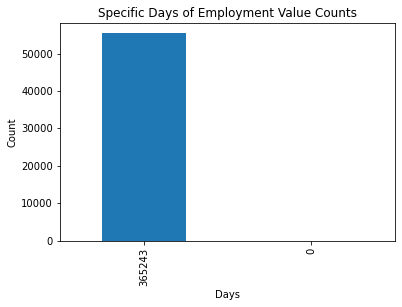

In [21]:
# De plus, il indique que la personne a travaille pendant 100 ans. --> BIZARE

train_df[train_df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts().plot(kind='bar');
plt.title('Specific Days of Employment Value Counts')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [22]:
# the percentage of this value in our dataset
value_perctage = len(train_df[train_df['DAYS_EMPLOYED']==365243])/len(train_df) * 100
print('Records with this value represent {:.2f}% of all data.'.format(value_perctage))

Records with this value represent 18.01% of all data.


In [23]:
#train_df[train_df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].mean()
train_df[train_df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].median()


365243.0

18% of our dataset with this value, it may be an error and it must be replaced with the mean or median value.

-------------
5) Un client possede une voiture de 91 ans 

In [24]:
# Repartition de TARGET lorsque OWN_CAR_AGE > 60
display(train_df[train_df['OWN_CAR_AGE']>60][['OWN_CAR_AGE','TARGET']]['TARGET'].value_counts())

# Presentation de OWN_CAR_AGE et TARGET lorsque OWN_CAR_AGE > 70
display(train_df[train_df['OWN_CAR_AGE']>70][['OWN_CAR_AGE','TARGET']])

0    3059
1     280
Name: TARGET, dtype: int64

,OWN_CAR_AGE,TARGET
SK_ID_CURR,,
415025,91.0,1
440757,91.0,0


Supprimer ces deux lignes --> leslignes avec OWN_CAR_AGE > 70

-------------
6) Le nombre de jour minimun qu'une personne a changé de numero de telephone avant une candidature 

Il y a 37672 lignes avec la condition DAYS_LAST_PHONE_CHANGE = 0
Elle represente 12.25% de nos donnes.


/var/folders/vw/zs_x6xxd66l8jg39kkltskgr0000gn/T/ipykernel_94230/632947656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susp_df3['YEARS_EMPLOYED'] = susp_df3['DAYS_EMPLOYED']/-365.25


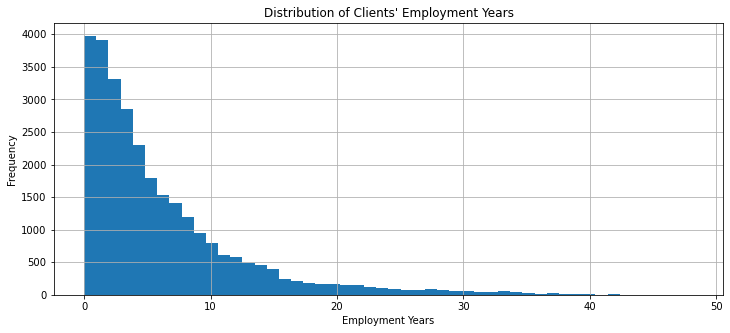

In [25]:
# Recuperation des lignes lorsque DAYS_LAST_PHONE_CHANGE = 0
susp_df3 = train_df[train_df['DAYS_LAST_PHONE_CHANGE']==0]
print('Il y a {} lignes avec la condition DAYS_LAST_PHONE_CHANGE = 0'.format(len(susp_df3)))
print('Elle represente {:.2f}% de nos donnes.'.format(len(susp_df3)/len(train_df) * 100))

susp_df3['YEARS_EMPLOYED'] = susp_df3['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(12,5))
# Repartiton de YEARS_EMPLOYED des personnes avec  DAYS_LAST_PHONE_CHANGE = 0 (sans compter l'erreur 365243)
susp_df3[susp_df3['YEARS_EMPLOYED']!=(365243/-365.25)]['YEARS_EMPLOYED'].hist(bins=50)
plt.title('Distribution of Clients\' Employment Years')
plt.xlabel('Employment Years')
plt.ylabel('Frequency')
plt.show()

Je pense que c'est une erreur et il faut le remplacer par la moyenne ou la median

-------------
# Exploration

(91.92711805431351, 8.072881945686495)

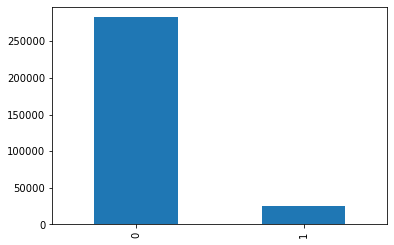

In [26]:
train_df['TARGET'].value_counts().plot(kind='bar')
282686/(282686+24825)*100, 24825/(282686+24825)*100

1) Repartition de demande de credit selon les genres

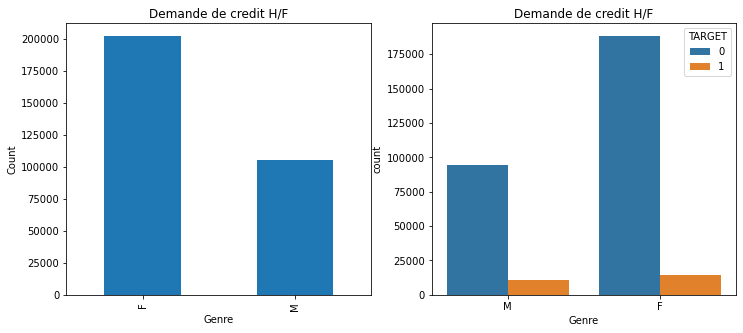

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
train_df[train_df['CODE_GENDER']!='XNA']['CODE_GENDER'].value_counts().plot(kind='bar', title='Demande de credit H/F');
plt.xlabel('Genre')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=train_df[train_df['CODE_GENDER']!='XNA'], x='CODE_GENDER', hue='TARGET');
plt.title('Demande de credit H/F')
plt.xlabel('Genre')
plt.show()

- Les femmes font une demande de credit plus que les hommes
- Le genre ne joue aucun role sur le TARGET

2) Repartition des clients selon les types de credit

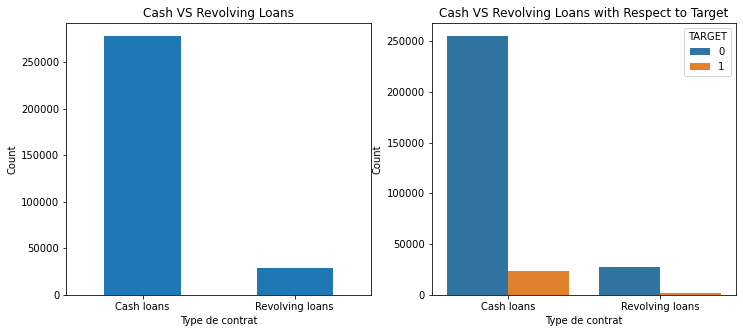

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
train_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Cash VS Revolving Loans');
plt.xlabel('Type de contrat')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=train_df, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Cash VS Revolving Loans with Respect to Target')
plt.xlabel('Type de contrat')
plt.ylabel('Count')
plt.show()

- Beacoup plus de gens font une demmande de credit en espece et moins de gent font une demande de credit renouvelable
- On voit la proportion de presonne qui ne rembourse pas dans les deux types de credit

3) L'âge du client joue-il un rôle par raport au remboursement?

/var/folders/vw/zs_x6xxd66l8jg39kkltskgr0000gn/T/ipykernel_94230/2223643549.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function a

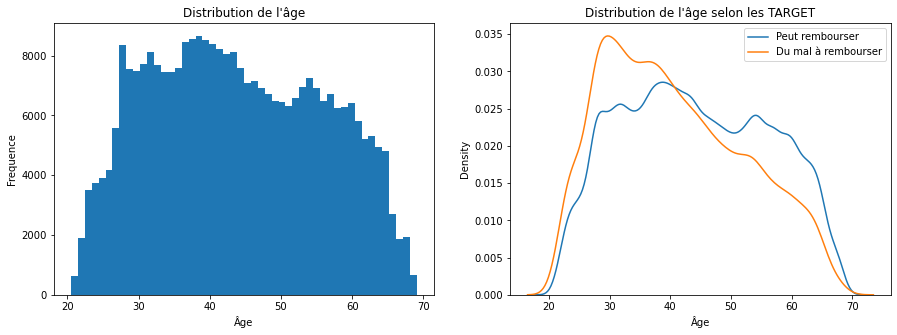

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(train_df['DAYS_BIRTH']/-365.25).plot(kind='hist', bins=50, title="Distribution de l'âge");
plt.xlabel('Âge')
plt.ylabel('Frequence')

plt.subplot(1, 2, 2)
proper_day_birth_df = train_df[['DAYS_BIRTH', 'TARGET']]
proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Peut rembourser');
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==1]['DAYS_BIRTH'], hist=False, label='Du mal à rembourser');
plt.title("Distribution de l'âge selon les TARGET")
plt.xlabel('Âge')
plt.legend();
plt.show()

- Les clients qui ont autour de 30 ans ont du mal à rembourser 
- Ce parametre pourrait être interresant dans la suite du projet

4) Y-a-t-il un lien entre le nombre d'enfant et l'abilité de remboursement d'un client ?

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


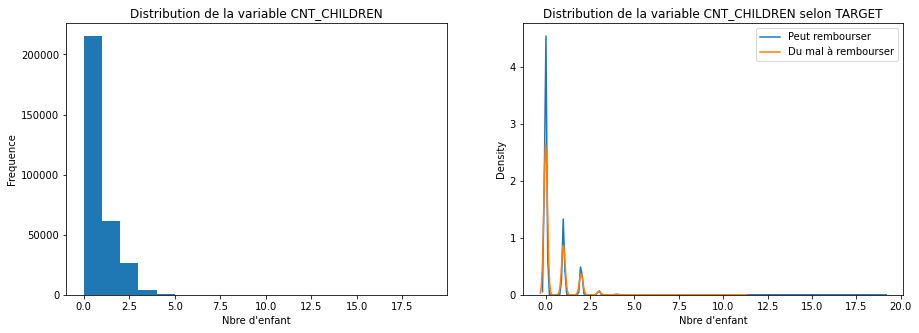

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
train_df['CNT_CHILDREN'].plot(kind='hist', bins=19, title='Distribution de la variable CNT_CHILDREN');
plt.xlabel("Nbre d'enfant")
plt.ylabel('Frequence')

plt.subplot(1, 2, 2)
sns.distplot(train_df[train_df['TARGET']==0]['CNT_CHILDREN'], hist=False, label='Peut rembourser');
sns.distplot(train_df[train_df['TARGET']==1]['CNT_CHILDREN'], hist=False, label='Du mal à rembourser');
plt.title('Distribution de la variable CNT_CHILDREN selon TARGET')
plt.xlabel("Nbre d'enfant")
plt.legend()
plt.show()

- Les clients qui n'ont pas d'enfant font une demande de credit plus que les autres.
- Plus une personne a d'enfant, plus la personne demande de credit

5) AMT_INCOME_TOTAL joue-t-il un rôle sur le TARGET ?

/var/folders/vw/zs_x6xxd66l8jg39kkltskgr0000gn/T/ipykernel_94230/201717998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proper_income_df['AMT_INCOME_TOTAL'] = proper_income_df['AMT_INCOME_TOTAL']/10000
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated functio

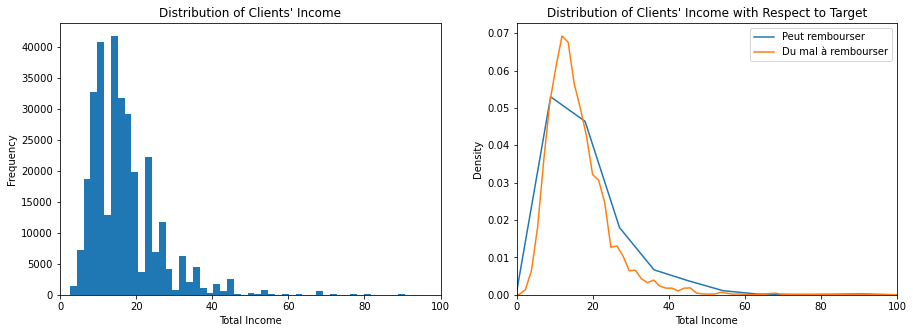

In [31]:
# Is there a relation between client income ant the amount of loan apply for?
# Does income and credit affect in the ability to repay?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
proper_income_df = train_df[train_df['AMT_INCOME_TOTAL']!=117000000.0]
proper_income_df['AMT_INCOME_TOTAL'] = proper_income_df['AMT_INCOME_TOTAL']/10000
proper_income_df['AMT_INCOME_TOTAL'].plot(kind='hist', bins=1000, title='Distribution of Clients\' Income');
plt.xlabel('Total Income')
plt.xlim([0,100])

plt.subplot(1, 2, 2)
sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Peut rembourser');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Du mal à rembourser');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('Total Income')
plt.xlim([0,100])
plt.legend();
plt.show()

- Les clients qui ont une revenue petit demandent plus de credit.
- Les gens qui gagnent beacoup font moins de demande de credit.
- Les gens qui gagnent moins ont du mal à rembouser. 

6) Les types de clients avec les types de revenues

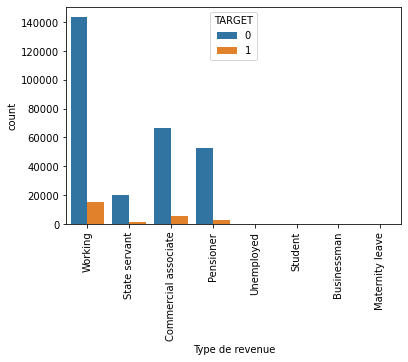

In [32]:
# 0 --> Peut rembourser
# 1 --> Du mal à rembourser
ax = sns.countplot(data=train_df, x='NAME_INCOME_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.xlabel('Type de revenue')
plt.show()

In [33]:
l_col, l_val = [], []
for target in train_df.TARGET.unique():
    for types in train_df.NAME_INCOME_TYPE.unique():
        l_col.append((types, target))
        l_val.append(train_df[(train_df.TARGET == target) & (train_df.NAME_INCOME_TYPE == types)].shape[0])
        
df_inter = pd.DataFrame({'NAME_INCOME_TYPE': l_col, 'COUNT': l_val})
df_inter['percentage'] = df_inter['COUNT'].apply(lambda x: x/df_inter['COUNT'].sum())
df_inter

,NAME_INCOME_TYPE,COUNT,percentage
0,"(Working, 1)",15224,0.049507
1,"(State servant, 1)",1249,0.004062
2,"(Commercial associate, 1)",5360,0.017430
3,"(Pensioner, 1)",2982,0.009697
4,"(Unemployed, 1)",8,0.000026
5,"(Student, 1)",0,0.000000
6,"(Businessman, 1)",0,0.000000
7,"(Maternity leave, 1)",2,0.000007
8,"(Working, 0)",143550,0.466813
9,"(State servant, 0)",20454,0.066515


In [34]:
df_inter_0 = pd.DataFrame(train_df[train_df.TARGET == 0]['NAME_INCOME_TYPE'].value_counts()).reset_index().rename(columns={"index": "NAME_INCOME_TYPE", "NAME_INCOME_TYPE": "COUNT_0"})
df_inter_1 = pd.DataFrame(train_df[train_df.TARGET == 1]['NAME_INCOME_TYPE'].value_counts()).reset_index().rename(columns={"index": "NAME_INCOME_TYPE", "NAME_INCOME_TYPE": "COUNT_1"})
df_inter = df_inter_0.merge(df_inter_1, how='left', on='NAME_INCOME_TYPE')

df_inter['PERCENATAGE_0'] = df_inter['COUNT_0'].apply(lambda x: x/df_inter['COUNT_0'].sum())
df_inter['PERCENATAGE_1'] = df_inter['COUNT_1'].apply(lambda x: x/df_inter['COUNT_1'].sum())

df_inter[['NAME_INCOME_TYPE', 'PERCENATAGE_0', 'PERCENATAGE_1']]

,NAME_INCOME_TYPE,PERCENATAGE_0,PERCENATAGE_1
0,Working,0.507807,0.613253
1,Commercial associate,0.234384,0.215911
2,Pensioner,0.185294,0.120121
3,State servant,0.072356,0.050312
4,Student,0.000064,NaN
5,Unemployed,0.000050,0.000322
6,Businessman,0.000035,NaN
7,Maternity leave,0.000011,0.000081


- Les clients de types Working font beacoup de demande de credit par rapport à d'autres
- On voit aussi qu'il y a des etudiants qui font des demandes et arrivent à bien passer

7) Les etudes jouent-ils un role sur le remboursemnt des credits?

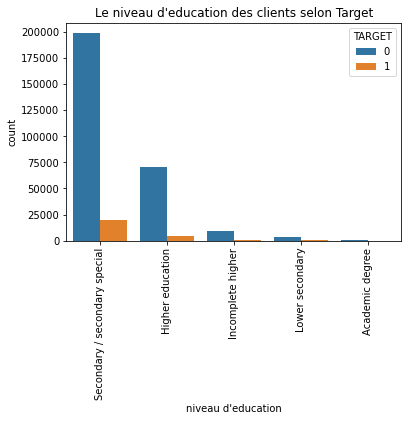

In [35]:
# 0 --> Peut rembourser
# 1 --> Du mal à rembourser
ax = sns.countplot(data=train_df, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title("Le niveau d'education des clients selon Target")
plt.xlabel("niveau d'education")
plt.show()

In [36]:
l_col, l_val = [], []
for target in train_df.TARGET.unique():
    for types in train_df.NAME_EDUCATION_TYPE.unique():
        l_col.append((types, target))
        l_val.append(train_df[(train_df.TARGET == target) & (train_df.NAME_INCOME_TYPE == types)].shape[0])
        
df_inter = pd.DataFrame({'NAME_EDUCATION_TYPE': l_col, 'COUNT': l_val})
df_inter['percentage'] = df_inter['COUNT'].apply(lambda x: x/df_inter['COUNT'].sum())
df_inter

,NAME_EDUCATION_TYPE,COUNT,percentage
0,"(Secondary / secondary special, 1)",0,NaN
1,"(Higher education, 1)",0,NaN
2,"(Incomplete higher, 1)",0,NaN
3,"(Lower secondary, 1)",0,NaN
4,"(Academic degree, 1)",0,NaN
5,"(Secondary / secondary special, 0)",0,NaN
6,"(Higher education, 0)",0,NaN
7,"(Incomplete higher, 0)",0,NaN
8,"(Lower secondary, 0)",0,NaN
9,"(Academic degree, 0)",0,NaN


In [37]:
df_inter_0 = pd.DataFrame(train_df[train_df.TARGET == 0]['NAME_EDUCATION_TYPE'].value_counts()).reset_index().rename(columns={"index": "NAME_EDUCATION_TYPE", "NAME_EDUCATION_TYPE": "COUNT_0"})
df_inter_1 = pd.DataFrame(train_df[train_df.TARGET == 1]['NAME_EDUCATION_TYPE'].value_counts()).reset_index().rename(columns={"index": "NAME_EDUCATION_TYPE", "NAME_EDUCATION_TYPE": "COUNT_1"})
df_inter = df_inter_0.merge(df_inter_1, how='left', on='NAME_EDUCATION_TYPE')

df_inter['PERCENATAGE_0'] = df_inter['COUNT_0'].apply(lambda x: x/df_inter['COUNT_0'].sum())
df_inter['PERCENATAGE_1'] = df_inter['COUNT_1'].apply(lambda x: x/df_inter['COUNT_1'].sum())

df_inter[['NAME_EDUCATION_TYPE', 'PERCENATAGE_0', 'PERCENATAGE_1']]

,NAME_EDUCATION_TYPE,PERCENATAGE_0,PERCENATAGE_1
0,Secondary / secondary special,0.703491,0.786465
1,Higher education,0.250646,0.161490
2,Incomplete higher,0.033270,0.035126
3,Lower secondary,0.012024,0.016798
4,Academic degree,0.000570,0.000121


- Les clients avec un niveau 'Secondary' demandent plus de credit par rapport à d'autres
- On observe qu'il y a moins de gens qui ont du mal à rembourser lorsqu'ils ont fait des etudes de type 'academic degree'
- 9% des gens qui ont fait des études 'Secondary / secondary special' ont du mal à rembourser 
- 1.8% des gens qui ont fait des études 'Academic degree' ont du mal à rembourser 

8) Les gens qui possedent des logements ont-ils du mal à rembouser leurs credits?

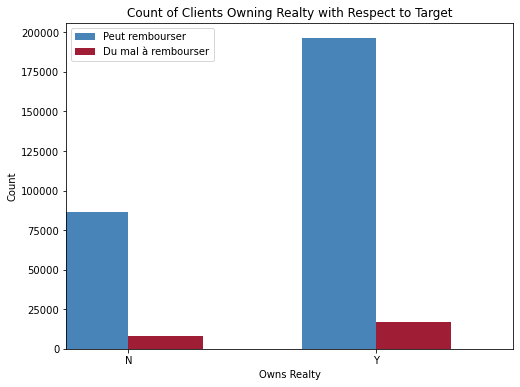

In [38]:
# 0 --> Peut rembourser
# 1 --> Du mal à rembourser
plt.figure(figsize=(8,6))
train_df[train_df['TARGET']==0].groupby(['FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#4984B8', width=0.3,  position=1, label='Peut rembourser')
train_df[train_df['TARGET']==1].groupby(['FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#9F1D35', width=0.3,  position=0, label='Du mal à rembourser')
plt.title('Count of Clients Owning Realty with Respect to Target');
plt.ylabel('Count')
plt.xlabel('Owns Realty')
plt.xticks(rotation=0)
plt.legend()

9) Y-a-t-il un lien entre 'DAYS_EMPLOYED' et 'TARGET'

/var/folders/vw/zs_x6xxd66l8jg39kkltskgr0000gn/T/ipykernel_94230/1714144738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proper_days_empolyed_df['YEARS_EMPLOYED'] = proper_days_empolyed_df['DAYS_EMPLOYED']/-365.25
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated func

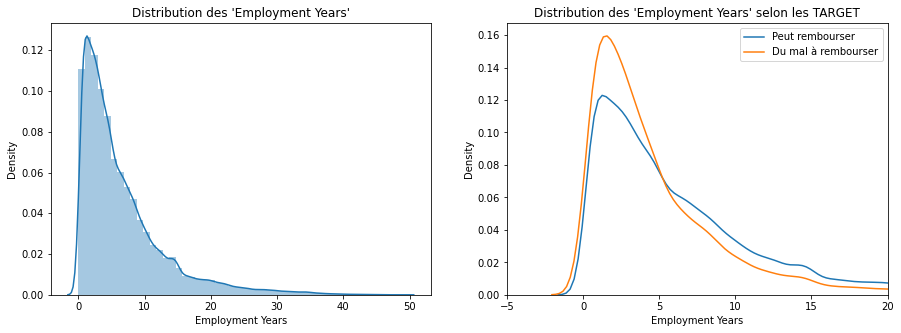

In [39]:
proper_days_empolyed_df = train_df[train_df['DAYS_EMPLOYED']!=365243]
proper_days_empolyed_df['YEARS_EMPLOYED'] = proper_days_empolyed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_empolyed_df['YEARS_EMPLOYED'])
plt.title("Distribution des 'Employment Years'")
plt.xlabel('Employment Years')

plt.subplot(1, 2, 2)
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label='Peut rembourser');
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label='Du mal à rembourser');
plt.title("Distribution des 'Employment Years' selon les TARGET");
plt.xlim([-5,20])
plt.xlabel('Employment Years')
plt.legend();

- Les clients avec 'Employment Years' inferieur à 5 ans font des demandes de credit beacoup plus que les autres et ils ont du mal à payer.

## PRETRAITEMENT

In [40]:
# before start cleaning, we keep copy of datasets
train_copy = train_df.copy()
test_copy = test_df.copy()

# extract these columns from nans_df
drop_cols = nans_df[nans_df['% de NaN']>40]['Colonne'].tolist()
keep_cols = [col for col in train_df.columns if col not in drop_cols]

# extract the new train dataframe
train_df = train_df[keep_cols]

# remove Target from keep_cols and create the new test dataframe
keep_cols.remove('TARGET')
test_df = test_df[keep_cols]

# check the new datasets shapes
print(train_df.shape)
print(test_df.shape)

(307511, 72)
(48744, 71)


In [41]:
# extract all records doesn't have XNA value in CODE_GENDER column
train_df = train_df[train_df['CODE_GENDER']!='XNA']

# check
train_df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [42]:
train_df = train_df[train_df['AMT_INCOME_TOTAL'] != 117000000.0]

In [43]:
# DAYS_EMPLOYED column
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
test_df['DAYS_EMPLOYED'] = test_df['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)

# check
print(train_df['DAYS_EMPLOYED'].max())
print(test_df['DAYS_EMPLOYED'].max())

0.0
-1.0


In [44]:
# DAYS_LAST_PHONE_CHANGE column
train_df['DAYS_LAST_PHONE_CHANGE'] = train_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)
test_df['DAYS_LAST_PHONE_CHANGE'] = test_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)

# check
print(train_df['DAYS_LAST_PHONE_CHANGE'].max())
print(test_df['DAYS_LAST_PHONE_CHANGE'].max())

-1.0
-1.0


## CREATION DE NOUVELLES VARIABLES (Feature Engineering)

In [45]:
# Difference entre credit/debit
train_df['Credit/Income'] = train_df['AMT_CREDIT']/train_df['AMT_INCOME_TOTAL']
train_df[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'Credit/Income']].head(5)

,AMT_CREDIT,AMT_INCOME_TOTAL,Credit/Income
SK_ID_CURR,,,
100002,406597.5,202500.0,2.007889
100003,1293502.5,270000.0,4.790750
100004,135000.0,67500.0,2.000000
100006,312682.5,135000.0,2.316167
100007,513000.0,121500.0,4.222222


In [46]:
# annuity/income
train_df['Annuity/Income'] = train_df['AMT_ANNUITY']/train_df['AMT_INCOME_TOTAL']
train_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'Annuity/Income']].head(5)

,AMT_ANNUITY,AMT_INCOME_TOTAL,Annuity/Income
SK_ID_CURR,,,
100002,24700.5,202500.0,0.121978
100003,35698.5,270000.0,0.132217
100004,6750.0,67500.0,0.100000
100006,29686.5,135000.0,0.219900
100007,21865.5,121500.0,0.179963


In [47]:
# le temps de travail / l'age
train_df['Employed/Birth'] = train_df['DAYS_EMPLOYED']/train_df['DAYS_BIRTH']
train_df[['DAYS_EMPLOYED', 'DAYS_BIRTH', 'Employed/Birth']].head(5)

,DAYS_EMPLOYED,DAYS_BIRTH,Employed/Birth
SK_ID_CURR,,,
100002,-637.0,-9461,0.067329
100003,-1188.0,-16765,0.070862
100004,-225.0,-19046,0.011814
100006,-3039.0,-19005,0.159905
100007,-3038.0,-19932,0.152418


In [48]:
# flag represents if his employmeny years is greater than 5 or not
train_df['Flag_Employment_Greater_5'] = (train_df['DAYS_EMPLOYED']/-365.25).apply(lambda x: 1 if x > 5 else 0)
train_df[['DAYS_EMPLOYED', 'Flag_Employment_Greater_5']].head(5)

,DAYS_EMPLOYED,Flag_Employment_Greater_5
SK_ID_CURR,,
100002,-637.0,0
100003,-1188.0,0
100004,-225.0,0
100006,-3039.0,1
100007,-3038.0,1


In [49]:
# flag represents if his income is greater than the loan or not
train_df['Flag_Income_Greater_Credit'] = train_df['AMT_INCOME_TOTAL'] > train_df['AMT_CREDIT'] 
train_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'Flag_Income_Greater_Credit']].head(5)

,AMT_INCOME_TOTAL,AMT_CREDIT,Flag_Income_Greater_Credit
SK_ID_CURR,,,
100002,202500.0,406597.5,False
100003,270000.0,1293502.5,False
100004,67500.0,135000.0,False
100006,135000.0,312682.5,False
100007,121500.0,513000.0,False


In [50]:
# creation d'une variable nbre_missing_doc
flag = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
train_df['nbr_doc'] = train_df.apply(lambda x: x[flag].sum(), axis=1)


## CORRELATION

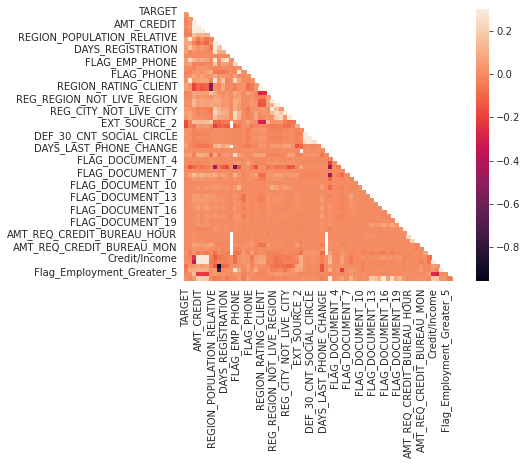

In [51]:
corr = train_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [52]:
df_corr = train_df.corr()
col = df_corr.index
for i in range(len(col)):
    for j in range(i+1, len(col)):
        if abs(df_corr.iloc[i][col[j]])>0.5:
            print('-', col[i], '/',col[j])

- CNT_CHILDREN / CNT_FAM_MEMBERS
- AMT_CREDIT / AMT_ANNUITY
- AMT_CREDIT / AMT_GOODS_PRICE
- AMT_CREDIT / Credit/Income
- AMT_ANNUITY / AMT_GOODS_PRICE
- AMT_GOODS_PRICE / Credit/Income
- REGION_POPULATION_RELATIVE / REGION_RATING_CLIENT
- REGION_POPULATION_RELATIVE / REGION_RATING_CLIENT_W_CITY
- DAYS_BIRTH / FLAG_EMP_PHONE
- DAYS_EMPLOYED / Employed/Birth
- DAYS_EMPLOYED / Flag_Employment_Greater_5
- FLAG_EMP_PHONE / FLAG_DOCUMENT_6
- REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY
- REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY
- OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE
- Credit/Income / Annuity/Income
- Employed/Birth / Flag_Employment_Greater_5


LES ELEMENTS QUE J'AI SUPPRIME (couple d'élément corrélé  --> élément supprimé)
- CNT_CHILDREN / CNT_FAM_MEMBERS --> CNT_CHILDREN

- AMT_CREDIT / AMT_ANNUITY --> AMT_ANNUITY
- AMT_CREDIT / AMT_GOODS_PRICE --> AMT_GOODS_PRICE
- AMT_CREDIT / Credit/Income --> Credit/Income
- Credit/Income / Annuity/Income --> Credit/Income
- AMT_ANNUITY / AMT_GOODS_PRICE --> les deux
- AMT_GOODS_PRICE / Credit/Income --> les deux
______
- DAYS_EMPLOYED / Employed/Birth --> Employed/Birth
- DAYS_EMPLOYED / Flag_Employment_Greater_5 --> Flag_Employment_Greater_5
- Employed/Birth / Flag_Employment_Greater_5 --> les deux
______
- DAYS_BIRTH / FLAG_EMP_PHONE --> FLAG_EMP_PHONE
______
- REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY --> REGION_RATING_CLIENT_W_CITY
- REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION --> LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY --> LIVE_CITY_NOT_WORK_CITY
______
- OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE --> OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE --> DEF_30_CNT_SOCIAL_CIRCLE

In [53]:
selected_col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 
                'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 
                'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3', 
                'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 
                'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
                'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
                'Annuity/Income','Flag_Income_Greater_Credit', 'nbr_doc']


In [54]:
df_corr_target_col = train_df[selected_col+['TARGET']].corr()['TARGET'].reset_index().rename(columns={'index': 'col', 'TARGET': 'correlation'})


In [55]:
df_corr_target_col.loc[(df_corr_target_col.correlation > 0.1) | (df_corr_target_col.correlation < -0.1)]


,col,correlation
19,EXT_SOURCE_2,-0.160452
20,EXT_SOURCE_3,-0.178906
33,TARGET,1.000000


## Entrainement / Test

In [56]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle 


import sklearn

### Encoding

In [57]:
# Traitement des données numeriques et remplacer les outliers par medians
# Utilisation de Min-Max Scaler
numeric_transformer = Pipeline(
    steps=[("num_imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

# Traitement des données de type object et remplacer les outliers par le plus frequent
# Utilisation de One-Hot Encoding
categorical_transformer = Pipeline(
    steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder())]
)

# Creation d'un pipeline finale
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude="object")),
        ("cat", categorical_transformer, make_column_selector(dtype_include="object")),
    ]
)

In [58]:
X = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']

In [59]:
y.value_counts()

0    282682
1     24824
Name: TARGET, dtype: int64

In [60]:
X_trans = preprocessor.fit_transform(X[selected_col])

### Oversampling

In [61]:
# create oversampler, downsampler instants
sm = SMOTE(sampling_strategy=0.3, random_state=42)
X_res, y_res = sm.fit_resample(X_trans, y)

In [62]:
y_res.value_counts()

0    282682
1     84804
Name: TARGET, dtype: int64

In [63]:
282682*0.3, 84804/24824

(84804.59999999999, 3.416210119239446)

### Split

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, train_size=0.8, stratify=y_res, random_state=42)


### Modeles

#### - Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400]
}

search_lr = GridSearchCV(estimator = lr, 
                          param_grid = param_grid_lr,
                          cv=10)

search_lr.fit(X_train, y_train)

print(search_lr.best_score_, search_lr.best_params_)
pickle.dump(search_lr.best_estimator_, open("lr_classifier.pkl","wb")) 
#4h 0.7788481100995124 {'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yashwanth_mourouguessin/opt/anaco

0.7788481100995124 {'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}


In [65]:
with open("lr_classifier.pkl", 'rb') as f:
    lr_classifier = pickle.load(f)
    
print(classification_report(y_val, lr_classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     56537
           1       0.56      0.16      0.25     16961

    accuracy                           0.78     73498
   macro avg       0.68      0.56      0.56     73498
weighted avg       0.74      0.78      0.73     73498



#### - Random Forest Classifier

In [91]:
rdf = RandomForestClassifier()
        
param_grid_rdf = {
    'n_estimators': [25, 50, 75, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [1, 2, 3, 4]
}

search_rdf = GridSearchCV(estimator = rdf, 
                          param_grid = param_grid_rdf,
                          cv=10)

search_rdf.fit(X_train, y_train)

print(search_rdf.best_score_, search_rdf.best_params_)
pickle.dump(search_rdf.best_estimator_, open("rdf_classifier.pkl","wb")) 
#6h 43m 0.9062955015857384 {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/yashwanth_mourouguessin/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel

0.9062955015857384 {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
with open("rdf_classifier.pkl", 'rb') as f:
    rdf_classifier = pickle.load(f)
    
print(classification_report(y_val, rdf_classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56537
           1       0.99      0.61      0.75     16961

    accuracy                           0.91     73498
   macro avg       0.94      0.80      0.85     73498
weighted avg       0.92      0.91      0.90     73498



#### - XGBoost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
xgbc = GradientBoostingClassifier()

#    'loss': ['log_loss', 'deviance', 'exponenétial'],
#    'criterion': ['friedman_mse', 'squared_error', 'mse'],
#    'max_features': ['auto', 'sqrt', 'log2'],
param_grid_xgbc = {
    'criterion': ['friedman_mse'],
    'loss': ['deviance'],
    'max_features': ['auto', 'sqrt', 'log2']
}

search_xgbc = GridSearchCV(estimator = xgbc, 
                           param_grid = param_grid_xgbc,
                           cv=10)

search_xgbc.fit(X_train, y_train)

print(search_xgbc.best_score_, search_xgbc.best_params_)
pickle.dump(search_xgbc.best_estimator_, open("xgb_classifier_3.pkl","wb"))
# 2h 11m 0.9091221431519063 {'criterion': 'friedman_mse', 'loss': 'deviance'}
# 22m 32s  0.9091221431519063 {'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto'}

0.9091221431519063 {'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'auto'}


In [88]:
with open("xgb_classifier_3.pkl", 'rb') as f:
    xgb_classifier = pickle.load(f)
    
print(classification_report(y_val, xgb_classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     56537
           1       1.00      0.62      0.76     16961

    accuracy                           0.91     73498
   macro avg       0.95      0.81      0.85     73498
weighted avg       0.92      0.91      0.90     73498



_____

In [107]:
with open("xgb_classifier_3.pkl", 'rb') as f:
    classifier_f = pickle.load(f)

In [244]:
print(metrics.confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]))
print(metrics.confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel())
#tn, fp, fn, tp

[[0 2]
 [1 1]]
[0 2 1 1]


In [297]:
from sklearn import metrics

FPS, FNS, TPS = [], [], []

# X_val --> X_train
pred_proba_df = pd.DataFrame(classifier_f.predict_proba(X_val))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_val.to_numpy().reshape(y_val.to_numpy().size,1),
                                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))
    l = metrics.confusion_matrix(y_val.to_numpy().reshape(y_val.to_numpy().size,1),
                                   Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    FPS.append(l[0][1])
    FNS.append(l[1][0])
    TPS.append(l[1][1])
    
    print(metrics.confusion_matrix(y_val.to_numpy().reshape(y_val.to_numpy().size,1),Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))
    


******** For i = 0.05 ******
Our testing accuracy is 0.306783858064165
[[ 5688 50849]
 [  101 16860]]

******** For i = 0.1 ******
Our testing accuracy is 0.6101526572151623
[[28961 27576]
 [ 1077 15884]]

******** For i = 0.15 ******
Our testing accuracy is 0.7791776646983591
[[42606 13931]
 [ 2299 14662]]

******** For i = 0.2 ******
Our testing accuracy is 0.8589213311926855
[[49520  7017]
 [ 3352 13609]]

******** For i = 0.25 ******
Our testing accuracy is 0.8961060164902447
[[53085  3452]
 [ 4184 12777]]

******** For i = 0.3 ******
Our testing accuracy is 0.9113037089444611
[[54873  1664]
 [ 4855 12106]]

******** For i = 0.35 ******
Our testing accuracy is 0.9176032000870772
[[55816   721]
 [ 5335 11626]]

******** For i = 0.4 ******
Our testing accuracy is 0.9179569512095567
[[56252   285]
 [ 5745 11216]]

******** For i = 0.45 ******
Our testing accuracy is 0.9155079049770062
[[56452    85]
 [ 6125 10836]]

******** For i = 0.5 ******
Our testing accuracy is 0.91109962175841

,threshold,FPS,FNS,TPS,cout
0,0.05,50849,101,16860,51354
1,0.10,27576,1077,15884,32961
2,0.15,13931,2299,14662,25426
3,0.20,7017,3352,13609,23777
4,0.25,3452,4184,12777,24372
5,0.30,1664,4855,12106,25939
6,0.35,721,5335,11626,27396
7,0.40,285,5745,11216,29010
8,0.45,85,6125,10836,30710
9,0.50,27,6507,10454,32562


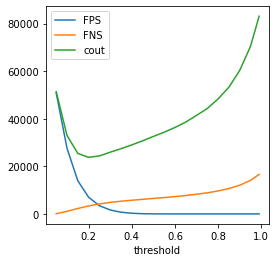

In [298]:
dfff = pd.DataFrame({'threshold': threshold_list, 
                     'FPS':FPS, 
                     'FNS':FNS, 
                     'TPS':TPS})

# HYPOTHESE: 5*FNS + FPS
# On connait pas la perte de l'argent dans le cas de FNS 
dfff['cout'] = (dfff['FNS']*5)+dfff['FPS']
display(dfff)

ax = dfff.plot(x="threshold", y=['FPS', 'FNS', 'cout'], figsize=(4, 4))


In [299]:
dfff.loc[dfff.cout == dfff['cout'].min()]

,threshold,FPS,FNS,TPS,cout
3,0.2,7017,3352,13609,23777


In [300]:
probas = classifier_f.predict_proba(X_val)

threshold = 0.2
pred_class =  (probas[:,1] >= threshold).astype('int')
print(classification_report(y_val.tolist(), pred_class))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     56537
           1       0.66      0.80      0.72     16961

    accuracy                           0.86     73498
   macro avg       0.80      0.84      0.81     73498
weighted avg       0.87      0.86      0.86     73498



# Features Importance

In [282]:
import shap

In [283]:
# load JS visualization code to notebook
shap.initjs()

In [301]:
explainer = shap.TreeExplainer(classifier_f)
shap_values = explainer.shap_values(X_val)

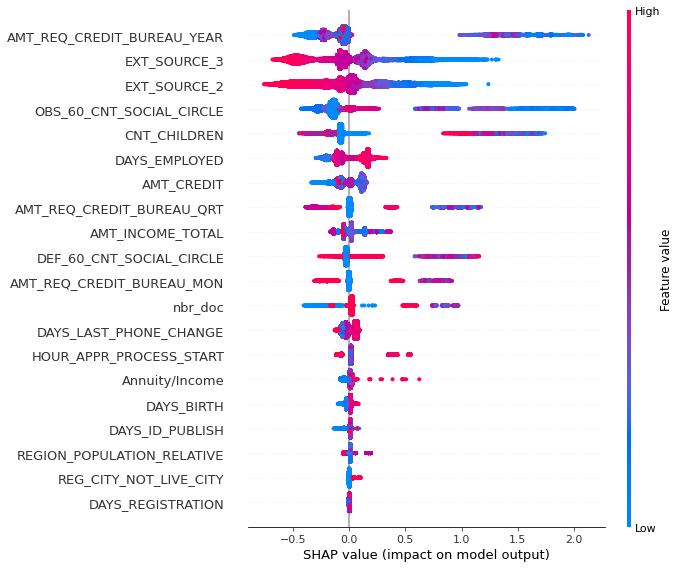

In [302]:
# IMPORTANCE DES FEATURES
shap.summary_plot(shap_values, features=X_val, feature_names=X[selected_col].columns)


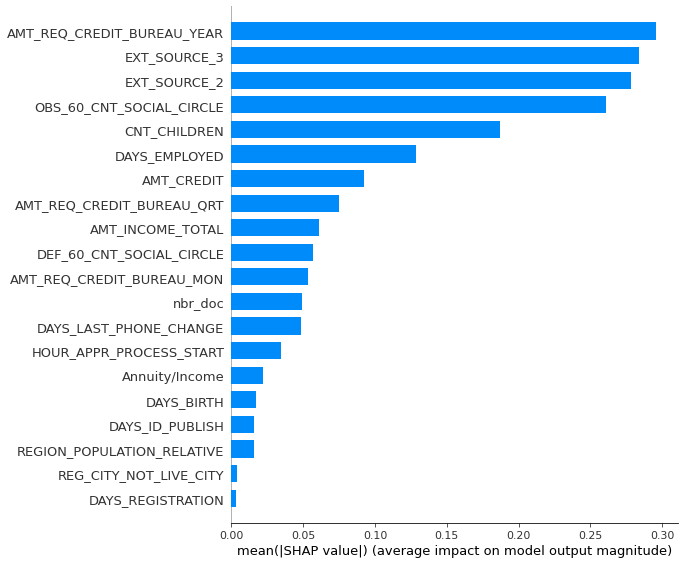

In [303]:
# IMPORTANCE DES FEATURES SOUS FORME 'barplot'
shap.summary_plot(shap_values, features=X_val, feature_names=X[selected_col].columns, plot_type='bar')


- API (avec flask) qui permet de retourver le score d'un client et affecte le 0 ou 1
- Un dashboard (dash ou streamlit):
    - pour un client donnée --> afficher si le client est accepté ou pas (avec les core sous forme de jauge) + les valeurs du client
    - mettre le graphique de l'importance des variables (sur tous les clients)
    - mettre le graphique de l'importance des variables (pour un client)
    